# Otto商品分类——数据探索&特征工程

Otto数据集是著名电商Otto提供的一个多类商品分类问题，类别数=9. 每个样本有93维数值型特征（整数，可能表示某种事件发生的次数，已经进行过脱敏处理）。 
竞赛官网：https://www.kaggle.com/c/otto-group-product-classification-challenge/data

第一名：https://www.kaggle.com/c/otto-group-product-classification-challenge/discussion/14335

第二名：http://blog.kaggle.com/2015/06/09/otto-product-classification-winners-interview-2nd-place-alexander-guschin/

In [1]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 读取数据

In [2]:
# 读取数据
# path to where the data lies
dpath = './data/'
train = pd.read_csv(dpath +"Otto_train.csv")
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

93个整数型匿名特征

In [10]:
#去掉索引列，与预测模型无关
train.drop(['id'], axis = 1, inplace = True)

In [11]:
## 各属性的统计特性
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


# 标签的分布

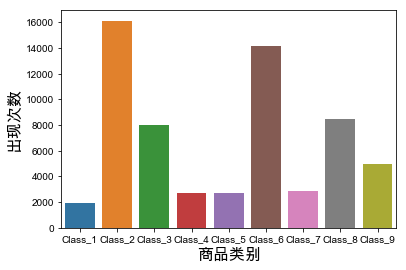

In [12]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(train.target);
plt.xlabel(u'商品类别',fontsize = 16);
plt.ylabel(u'出现次数',fontsize = 16);

各类样本不太均衡。交叉验证对分类任务默认采用StratifiedKFold，在每折采样时根据各类样本按比例采样

# 各特征的分布
猜测不同特征的分布差不太多，所以只观察一个特征feat_1的分布

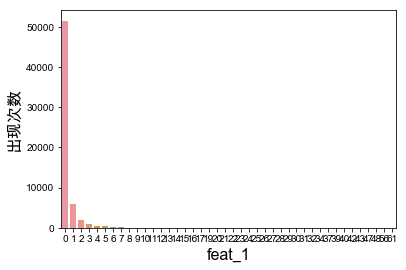

In [5]:
sns.countplot(train.feat_1);
plt.xlabel('feat_1',fontsize = 16);
plt.ylabel(u'出现次数',fontsize = 16);

特征值大部分是0（稀疏），是长尾分布，可以考虑log(x+1)变换，减弱长尾中大特征值的影响
特征稀疏（90%的数据为0）
看起来这些特征和计数有关系-->特征工程也可考虑TF-IDF

In [ ]:
#特征与标签之间的关系
#9类不好显示:(

# 特征之间的相关系数

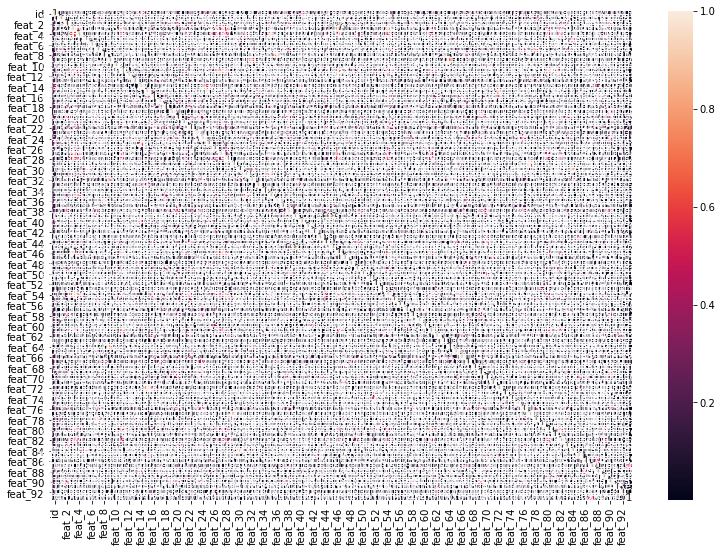

In [7]:
#get the names of all the columns
cols = train.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
feat_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(feat_corr,annot=True)

# Mask unimportant features
sns.heatmap(feat_corr, mask=feat_corr < 1, cbar=False)
plt.show()

In [8]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = feat_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (feat_corr.iloc[i,j] >= threshold and feat_corr.iloc[i,j] < 1) or (feat_corr.iloc[i,j] < 0 and feat_corr.iloc[i,j] <= -threshold):
            corr_list.append([feat_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

feat_39 and feat_45 = 0.82
feat_3 and feat_46 = 0.78
feat_15 and feat_72 = 0.76
feat_30 and feat_84 = 0.72
feat_9 and feat_64 = 0.70
feat_3 and feat_54 = 0.69
feat_29 and feat_77 = 0.61
feat_8 and feat_36 = 0.61
feat_11 and feat_27 = 0.60
feat_3 and feat_11 = 0.60
feat_3 and feat_4 = 0.58
feat_11 and feat_46 = 0.58
feat_61 and feat_80 = 0.58
feat_27 and feat_46 = 0.57
feat_46 and feat_54 = 0.57
feat_9 and feat_32 = 0.57
feat_7 and feat_78 = 0.57
feat_11 and feat_80 = 0.56
feat_14 and feat_25 = 0.56
feat_31 and feat_35 = 0.56
feat_52 and feat_74 = 0.55
feat_4 and feat_35 = 0.55
feat_3 and feat_28 = 0.55
feat_69 and feat_90 = 0.55
feat_11 and feat_61 = 0.54
feat_28 and feat_54 = 0.54
feat_4 and feat_54 = 0.53
feat_80 and feat_82 = 0.52
feat_2 and feat_90 = 0.52
feat_3 and feat_27 = 0.51
feat_46 and feat_61 = 0.50
feat_22 and feat_54 = 0.50
feat_27 and feat_61 = 0.50


特征之间相关性还好，考虑加正则

## 特征工程

特征变换，这个是体力活
1. 取对数log1p（对线性模型很重要，单调变换树模型影响不大）
2. tf-idf
3. 原始特征组合（加减乘除。如果是计数特征，乘法表示“and”，更有意义（FM）；或者可采用GBDT做特征编码，实现更高阶特征组合；原始特征维数太高，也可以先用基础模型得到特征的重要性，对重要的特征再组合）
4. t-SNE及PCA降维后的特征 （降维部分讲解）
5. 统计特征，如sum of the row, number of non-zero, max of the row，x-mean，个人感觉对这个数据集意义不大

## 分开特征和标签

In [9]:
# 标签
y_train = train['target']   #形式为Class_x

#暂存id，其实id没什么用
train_id = train['id']
# drop ids and get labels
X_train = train.drop(["id", "target"], axis=1)

#保存特征名字
columns_org = X_train.columns

# 1. feat编码：log(x+1)
原始特征feat_x看起来像计数特征，取log运算更接近人对数字的敏感度，更适合线性模型。
同时也可以降低长维分布中大数值的影响，减弱长维分布的长尾性。

In [10]:
X_train_log = np.log1p(X_train)

#重新组成DataFrame
feat_names = columns_org + "_log"
X_train_log = pd.DataFrame(columns = feat_names, data = X_train_log.values)

X_train_log.head()

,feat_1_log,feat_2_log,feat_3_log,feat_4_log,feat_5_log,feat_6_log,feat_7_log,feat_8_log,feat_9_log,feat_10_log,...,feat_84_log,feat_85_log,feat_86_log,feat_87_log,feat_88_log,feat_89_log,feat_90_log,feat_91_log,feat_92_log,feat_93_log
0,0.693147,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.693147,0.0,0.0,0.693147,1.94591,0.693147,1.791759,0.000000,0.0,0.693147,...,3.135494,0.000000,0.693147,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0


## 2. feat编码：TF-IDF
原始特征feat_x看起来像计数特征，类似文本分析中词频特征的处理，TF-IDF可以突出对特别类别有贡献的低频词。
这里原始特征已经是计数特征了，直接调用TfidfTransformer，将计数特征变成TF-IDF
如果输入是原始文本，需要将计数功能（TF）和IDF功能集中在一起，用TfidfVectorizer

In [11]:
# transform counts to TFIDF features
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

#输出稀疏矩阵
X_train_tfidf = tfidf.fit_transform(X_train).toarray()

#重新组成DataFrame,为了可视化
feat_names = columns_org + "_tfidf"
X_train_tfidf = pd.DataFrame(columns = feat_names, data = X_train_tfidf)

X_train_tfidf.head()

,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,feat_10_tfidf,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.080436,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.074055,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.227278,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.196169,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.011846,0.0,0.0,0.010756,0.103045,0.021145,0.073024,0.000000,0.0,0.013132,...,0.446712,0.000000,0.008051,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.121616,0.000000,0.000000,0.0,0.0,0.142568,0.0,0.0,0.0


## 3. 其他特征工程
5. 一行的最大值、和、非0元素数目
将这些特征加到原始特征中

In [12]:
#X_train['feat_max'] = X_train.max(axis=1)
#X_train['feat_sum'] = X_train.sum(axis=1)
#X_train['feat_zero_count'] = X_train.apply(lambda x : x.value_counts().get(0,0),axis=1)
#X_train.head()

## 数据预处理
由于数据极度稀疏，数据缩放应采用MinMaxScaler，使得变换后的数据继续保持稀疏。
如果将特征看似词频这种特征，也可以不用缩放
也可以对每个样本用模长归一

In [13]:
# 对原始数据缩放
from sklearn.preprocessing import MinMaxScaler
# 构造输入特征的标准化器
ms_org = MinMaxScaler()

#保存特征名字，用于结果保存为csv
feat_names_org = X_train.columns

# 用训练训练模型（得到均值和标准差）：fit
# 并对训练数据进行特征缩放：transform
X_train = ms_org.fit_transform(X_train)

In [14]:
# 对log数据缩放
from sklearn.preprocessing import MinMaxScaler
# 构造输入特征的标准化器
ms_log = MinMaxScaler()

#保存特征名字，用于结果保存为csv
feat_names_log = X_train_log.columns

# 用训练训练模型（得到均值和标准差）：fit
# 并对训练数据进行特征缩放：transform
X_train_log = ms_log.fit_transform(X_train_log)

In [15]:
# 对tf-idf数据缩放
from sklearn.preprocessing import MinMaxScaler

#保存特征名字，用于结果保存为csv
feat_names_tfidf = X_train_tfidf.columns

# 构造输入特征的标准化器
ms_tfidf = MinMaxScaler()

# 用训练训练模型（得到均值和标准差）：fit
# 并对训练数据进行特征缩放：transform
X_train_tfidf = ms_tfidf.fit_transform(X_train_tfidf)

In [16]:
#保存原始特征
y = pd.Series(data = y_train, name = 'target')
feat_names = columns_org
train_org = pd.concat([train_id, pd.DataFrame(columns = feat_names_org, data = X_train), y], axis = 1)
train_org.to_csv(dpath +'Otto_FE_train_org.csv',index=False,header=True)

In [17]:
#保存log特征变换结果
y = pd.Series(data = y_train, name = 'target')
train_log = pd.concat([train_id, pd.DataFrame(columns = feat_names_log, data = X_train_log), y], axis = 1)
train_log.to_csv(dpath +'Otto_FE_train_log.csv',index=False,header=True)

In [18]:
#保存tf-idf特征变换结果
y = pd.Series(data = y_train, name = 'target')
train_tfidf = pd.concat([train_id, pd.DataFrame(columns = feat_names_tfidf, data = X_train_tfidf), y], axis = 1)
train_tfidf.to_csv(dpath +'Otto_FE_train_tfidf.csv',index=False,header=True)

## 保存特征编码过程中用到的模型，用于后续对测试数据的特征编码

In [19]:
import cPickle

cPickle.dump(tfidf, open("tfidf.pkl", 'wb'))

cPickle.dump(ms_org, open("MinMaxSclaer_org.pkl", 'wb'))
cPickle.dump(ms_log, open("MinMaxSclaer_log.pkl", 'wb'))
cPickle.dump(ms_tfidf, open("MinMaxSclaer_tfidf.pkl", 'wb'))